<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-PabAleBravo/blob/main/Semana_7_Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Datos

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
#Consideramos dos variables
X = df[['highway-mpg']]
Y = df['price']

In [10]:
lm.fit(X,Y)
  

LinearRegression()

In [11]:
#Generamos una predicción:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
#Cual es el punto de intersección
lm.intercept_

38423.3058581574

In [13]:
#Cual es el valor de la pendiente
lm.coef_

array([-821.73337832])

In [18]:
lm.fit(df[['engine-size']], df[['price']])
lm.coef_

array([[166.86001569]])

In [19]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [20]:
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
lm.intercept_

-15806.62462632922

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

# **Gráfico de regresión**
Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Visualicemos el mpg en carretera como una posible variable predictora del precio:

(0.0, 48177.522740542714)

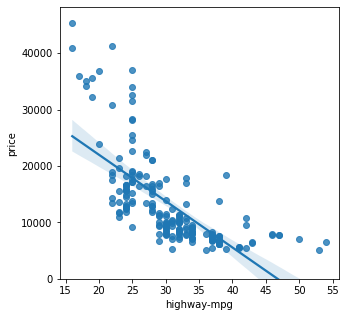

In [25]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

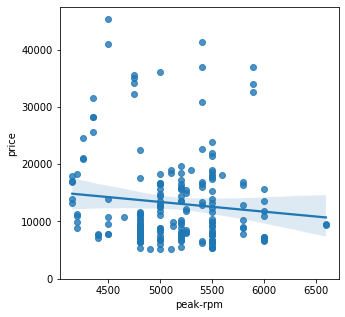

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [27]:
#Para identificar la correlación entre las variables
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


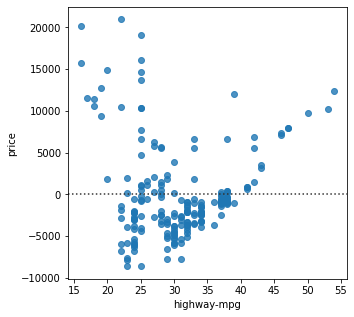

In [28]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

# **Regresión lineal múltiple**
¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

Primero, hagamos una predicción:

In [29]:
Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


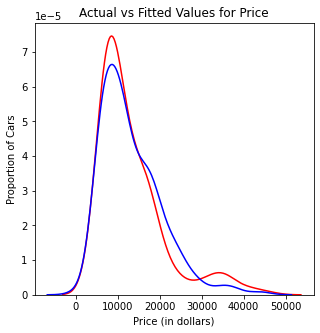

In [30]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# **Regresión polinomial y pipeline**
La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

In [31]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [32]:
x = df['highway-mpg']
y = df['price']

In [33]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


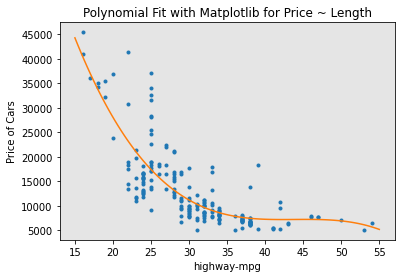

In [34]:
PlotPolly(p, x, y, 'highway-mpg')

In [35]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


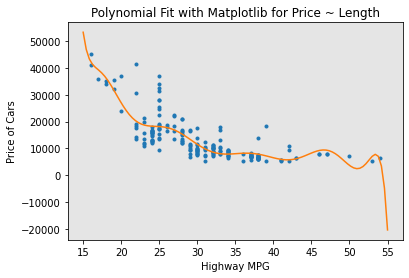

In [36]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [38]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [39]:
Z_pr=pr.fit_transform(Z)

In [40]:
Z.shape

(201, 4)

In [41]:
Z_pr.shape

(201, 15)

In [43]:
#Creamos el pipeline creando una lista de tuplas incluyendo el nombre del 
#modelo o estimador y su constructor correspondiente.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [47]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])